In [1]:
import numpy as np
from stl import mesh

# Load the STL file
stl_mesh = mesh.Mesh.from_file("C:\\Users\\gitop\\repos\\pinns\\src\\julia\\rear-wing-formula-1-1.snapshot.4\\rearwingcon2.stl")

In [2]:
# Calculate the area of each face
v0, v1, v2 = stl_mesh.v0, stl_mesh.v1, stl_mesh.v2
edge1 = v1 - v0
edge2 = v2 - v0
cross_product = np.cross(edge1, edge2)
areas = 0.5 * np.linalg.norm(cross_product, axis=1)

# Calculate the total surface area
total_area = np.sum(areas)

In [28]:
# Decide the number of points to sample
num_points_to_sample = 1000000

# Sample points
sample_points = []
for i in range(len(stl_mesh)):
    num_points_in_face = int(areas[i] / total_area * num_points_to_sample)
    for _ in range(num_points_in_face):
        barycentric_coords = np.random.random(3)
        barycentric_coords /= barycentric_coords.sum()  # Ensure they sum to 1
        sample_point = (
            stl_mesh.v0[i] * barycentric_coords[0]
            + stl_mesh.v1[i] * barycentric_coords[1]
            + stl_mesh.v2[i] * barycentric_coords[2]
        )
        sample_points.append(sample_point)

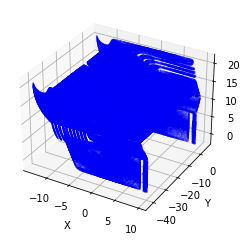

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create a new matplotlib figure and axes.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection object with the faces of the STL mesh.
poly_collection = Poly3DCollection(stl_mesh.vectors, facecolors='cyan', linewidths=0.05, edgecolors='r', alpha=0.1)
# ax.add_collection3d(poly_collection)

# Plot sampled points
sample_points = np.array(sample_points)

# Swap Y and Z axes for all sampled points
sample_points = np.column_stack((sample_points[:, 0], sample_points[:, 2], sample_points[:, 1]))

ax.scatter(sample_points[:, 0], sample_points[:, 1], sample_points[:, 2], c='b', s=0.005)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show plot
plt.show()

In [33]:
import csv

# Specify the file name
filename = 'rear_wing.csv'

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(['x', 'y', 'z'])
    
    # Write each point's coordinates as a row in the file
    for point in sample_points:
        writer.writerow(point)

In [37]:
min(sample_points[1])

0.031543612